# Credit card default propensity prediction

_Objective__ – Predict the probability of a customer defaulting payment for the credit card the subsequent month, based on past information. The past information is provided in the dataset. This probability will help the collections team to prioritise follow up with customers who have a high propensity of defaulting.

# About the dataset
The dataset contains the following information of 30000 customers:
1.	__DEFAULT__ - Default payment next month (Yes=1, No=0)
2.	__LIMIT_BAL__ - Amount of the given credit (INR)  
3.	__SEX__ - Gender (1 = male; 2 = female)
4.	__EDUCATION__ - Education (1 = graduate school; 2 = university; 3 = high school; 4 = others)
5.	__MARRIAGE__ - (1 = married; 2 = single; 3 = others)
6.	__AGE__ - (year)
7.	__PAST_PAY__ - History of repayment status
    <br> -  PAST_PAY1 = the repayment status in September 2005
    <br> -  PAST_PAY2 = the repayment status in August 2005
    <br> -  PAST_PAY6 = the repayment status in April 2005
    <br> -  The measurement scale for the repayment status is 
         i.  -1 = pay duly <br>
        ii.	 1 = payment delay for one month<br>
        iii. 2 = payment delay for two months <br>
        iv.	 8 = payment delay for eight months<br>
        v.	 9 = payment delay for nine months and above <br>
8.	__BILL_AMT__- Amount of bill statement (INR)
    <br> -  BILL_AMT1 = amount of bill statement in September 2005
    <br> -  BILL_AMT2 = amount of bill statement in August 2005
    <br> -  BILL_AMT6 = amount of bill statement in April 2005
9.	__PAY_AMT__ - Amount of previous payment (INR)
    <br> -  PAY_AMT1 = amount paid in September 2005
    <br> -  PAY_AMT2 = amount paid in August 2005
    <br> -  PAY_AMT6 = amount paid in April 2005

## Importing Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore") 

## Reading Dataset

In [85]:
df1=pd.read_csv('credit_card.csv')
df1.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [86]:
df1.shape

(30000, 25)

## Removing Duplicates

In [87]:
df1=df1.drop('ID',axis=1)

In [88]:
df1[df1.duplicated()].shape

(35, 24)

In [89]:
df=df1.drop_duplicates(keep='first')

In [90]:
df.shape

(29965, 24)

In [91]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Frequency count

In [92]:
df['SEX'].value_counts()

2    18091
1    11874
Name: SEX, dtype: int64

In [93]:
df['EDUCATION'].value_counts()

2    14019
1    10563
3     4915
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

In [94]:
df['MARRIAGE'].value_counts()

2    15945
1    13643
3      323
0       54
Name: MARRIAGE, dtype: int64

In [95]:
df['DEFAULT'].value_counts(1)

0    0.778742
1    0.221258
Name: DEFAULT, dtype: float64

## Converting Categorical to Numerical

In [96]:
df['SEX']=df['SEX'].map({1:'Male',2:'Female'})

In [97]:
df['EDUCATION']=df['EDUCATION'].map({1:'GraduateSchool',2:'University',3:'HighSchool',4:'Others',0:'Others',5:'Others',6:'Others'})

In [98]:
df['MARRIAGE']=df['MARRIAGE'].map({1:'Married',2:'Single',3:'Others',0:'Others'})

In [99]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Univariate Analysis

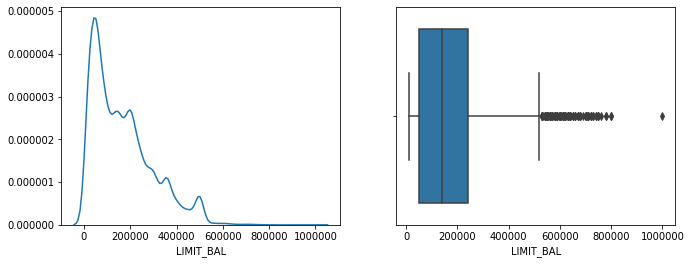

In [49]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['LIMIT_BAL'],hist=False,ax=axes[0])
sns.boxplot(df['LIMIT_BAL'],ax=axes[1])
plt.show()

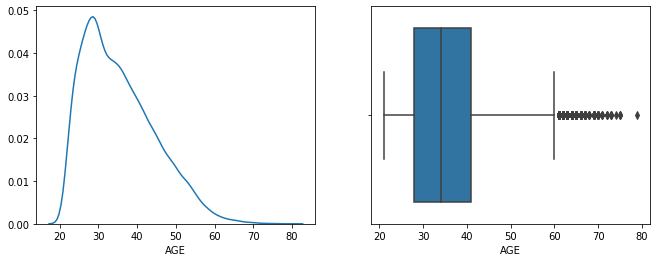

In [50]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['AGE'],hist=False,ax=axes[0])
sns.boxplot(df['AGE'],ax=axes[1])
plt.show()

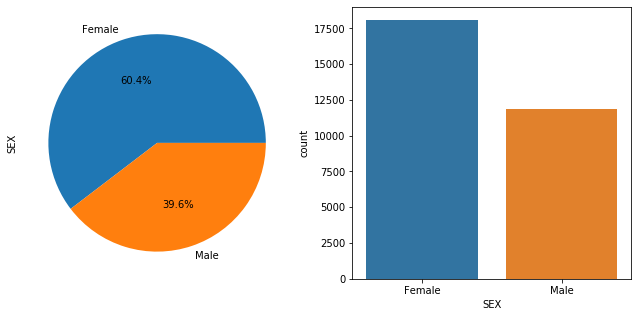

In [51]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['SEX'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['SEX'],ax=axes[1])
plt.show()

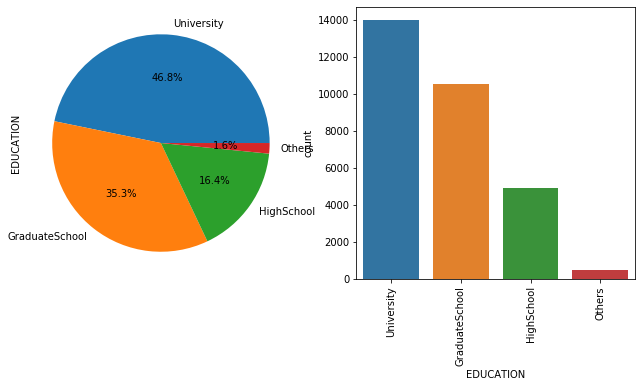

In [53]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['EDUCATION'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
plt.xticks(rotation=90)
sns.countplot(df['EDUCATION'],ax=axes[1])
plt.show()

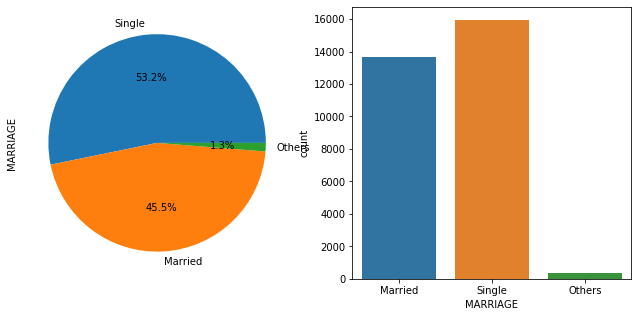

In [54]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['MARRIAGE'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['MARRIAGE'],ax=axes[1])
plt.show()

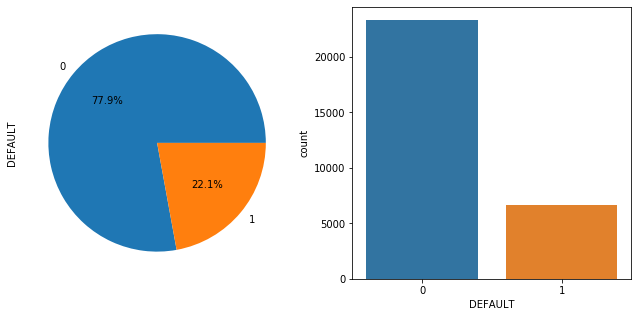

In [55]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['DEFAULT'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['DEFAULT'],ax=axes[1])
plt.show()

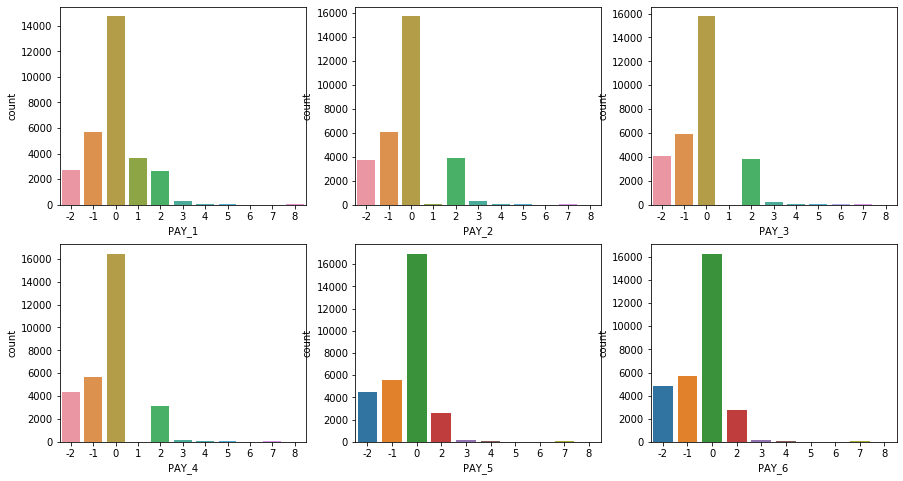

In [65]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.countplot(df['PAY_1'],ax=axes[0,0])
sns.countplot(df['PAY_2'],ax=axes[0,1])
sns.countplot(df['PAY_3'],ax=axes[0,2])
sns.countplot(df['PAY_4'],ax=axes[1,0])
sns.countplot(df['PAY_5'],ax=axes[1,1])
sns.countplot(df['PAY_6'],ax=axes[1,2])
plt.show()

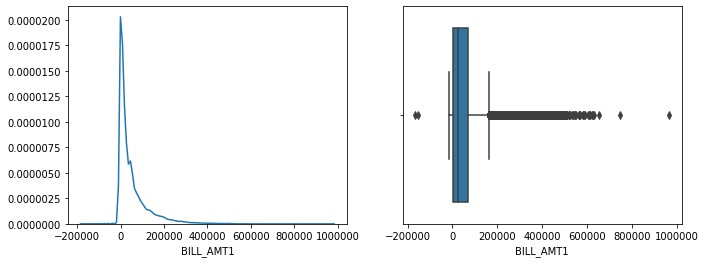

In [138]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['BILL_AMT1'],hist=False,ax=axes[0])
sns.boxplot(df['BILL_AMT1'],ax=axes[1])
plt.show()

In [127]:
df1=df.iloc[:,11:23]

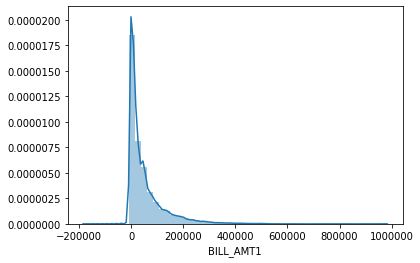

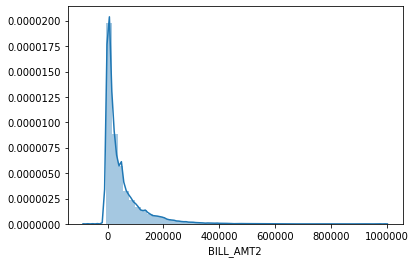

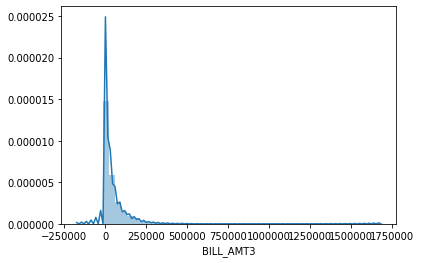

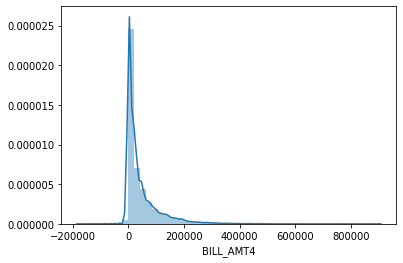

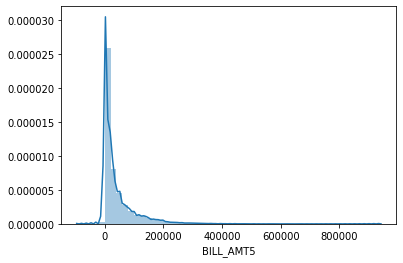

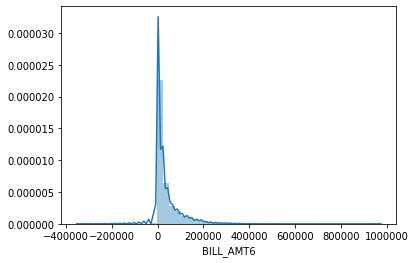

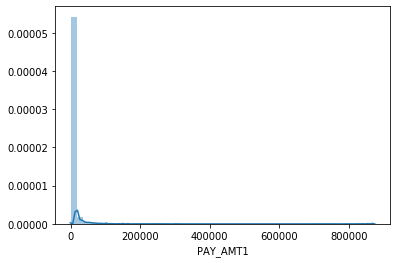

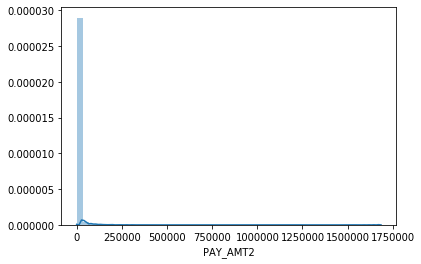

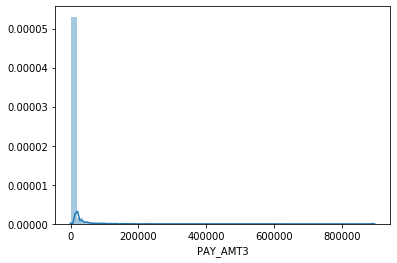

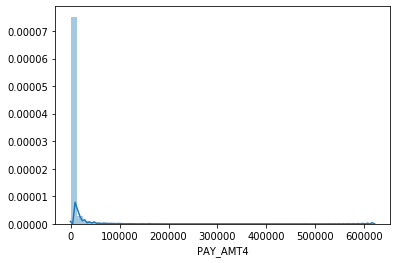

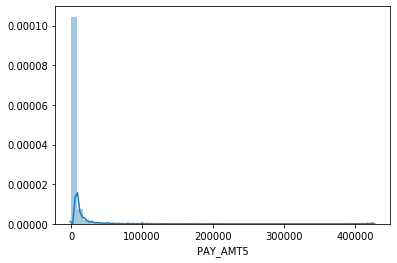

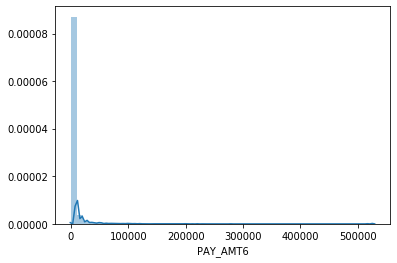

In [129]:
for i in df1.columns:
    if df1[i].dtype=='float64':
        sns.distplot(df[i])
    plt.xlabel(i)
    plt.show()

## Bivariate Analysis

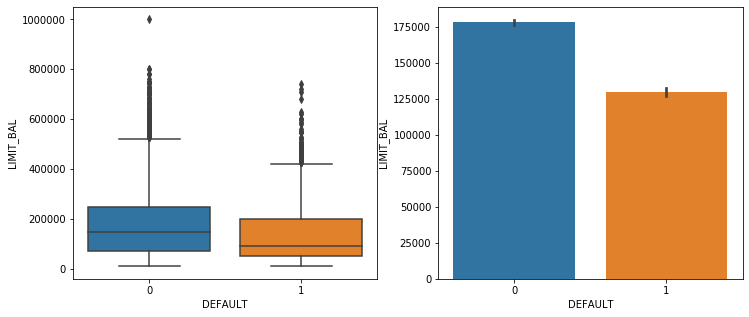

In [146]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y='LIMIT_BAL',x='DEFAULT',data=df,ax=axes[0])
sns.barplot(y='LIMIT_BAL',x='DEFAULT',data=df,ax=axes[1])
plt.show()

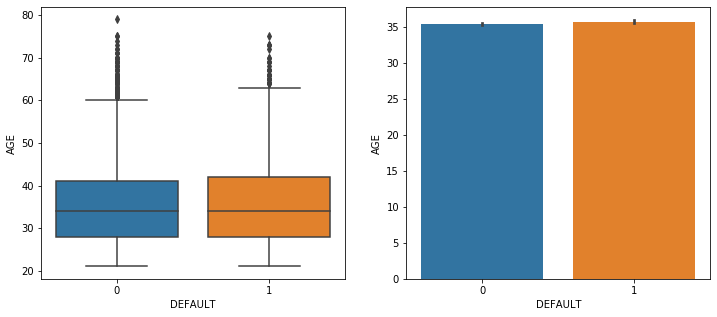

In [155]:
fig,axes=plt.subplots(1,2,figsize=(12,5))
sns.boxplot(y='AGE',x='DEFAULT',data=df,ax=axes[0])
sns.barplot(y='AGE',x='DEFAULT',data=df,ax=axes[1])
plt.show()

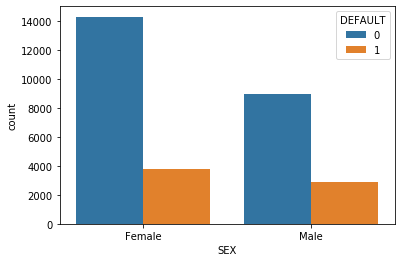

In [147]:
sns.countplot(x='SEX',data=df,hue='DEFAULT')
plt.show()

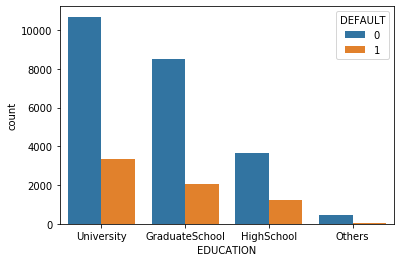

In [154]:
sns.countplot(x='EDUCATION',data=df,hue='DEFAULT')
plt.show()

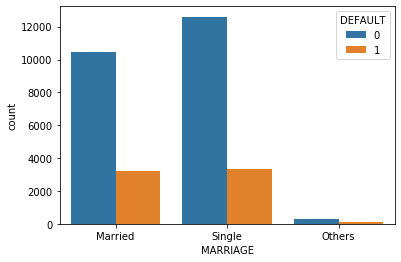

In [194]:
sns.countplot(x='MARRIAGE',data=df,hue='DEFAULT')
plt.show()

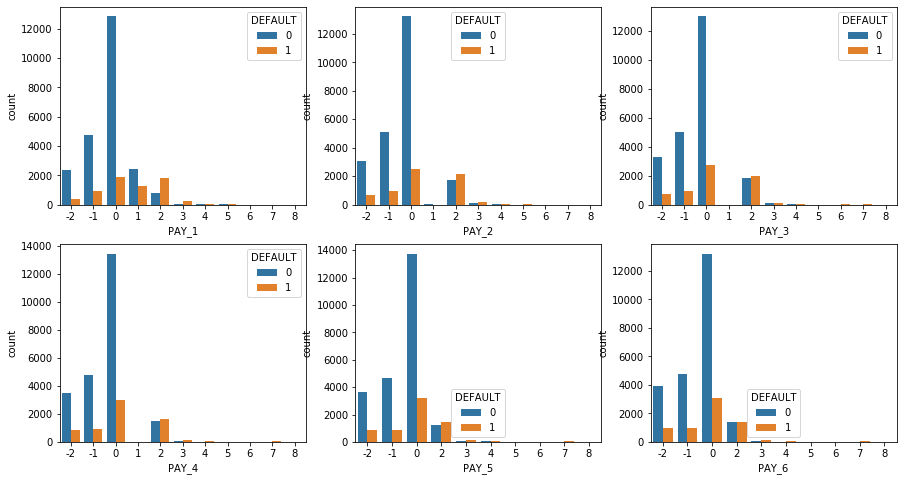

In [157]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.countplot(x='PAY_1',data=df,hue='DEFAULT',ax=axes[0,0])
sns.countplot(x='PAY_2',data=df,hue='DEFAULT',ax=axes[0,1])
sns.countplot(x='PAY_3',data=df,hue='DEFAULT',ax=axes[0,2])
sns.countplot(x='PAY_4',data=df,hue='DEFAULT',ax=axes[1,0])
sns.countplot(x='PAY_5',data=df,hue='DEFAULT',ax=axes[1,1])
sns.countplot(x='PAY_6',data=df,hue='DEFAULT',ax=axes[1,2])
plt.show()

In [174]:
df3=df.iloc[:,11:24]

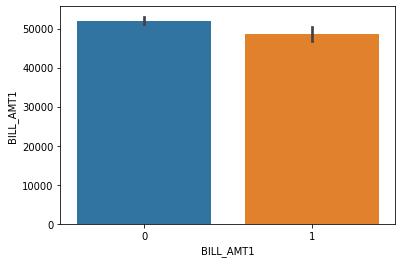

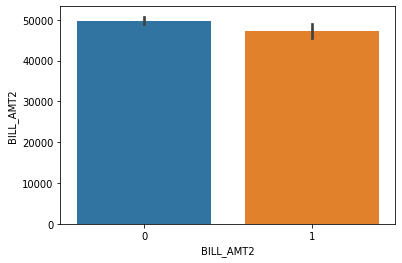

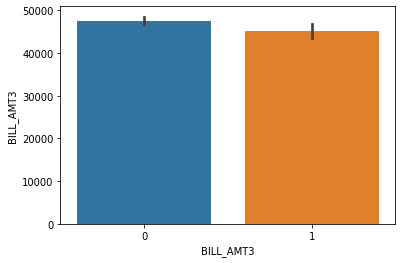

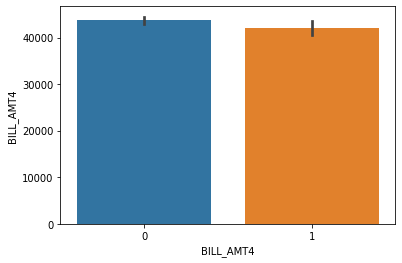

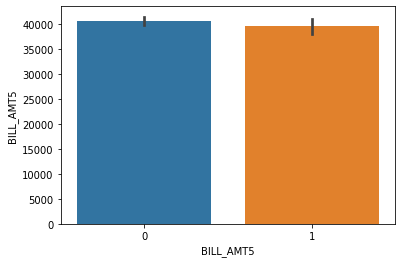

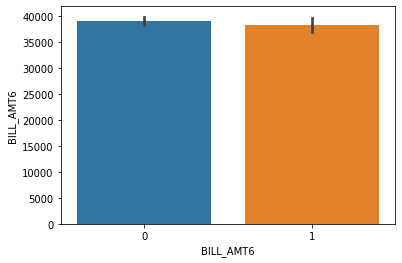

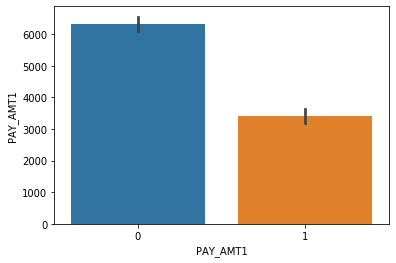

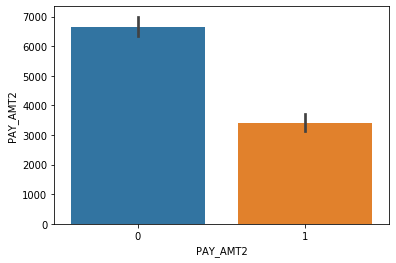

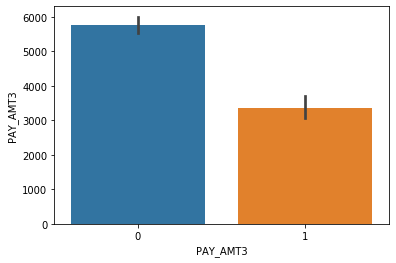

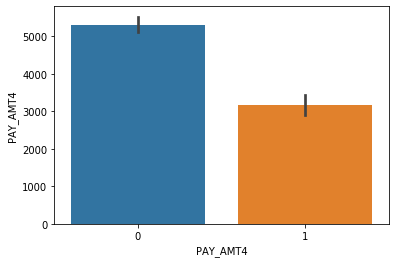

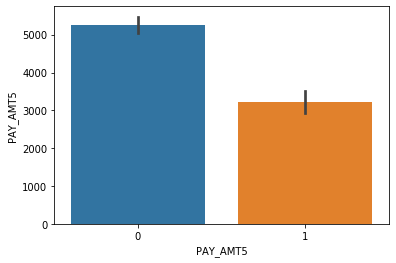

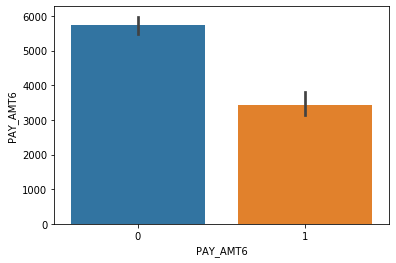

In [178]:
for i in df3.columns:
    if df3[i].dtype=='float64':
        sns.barplot(df3['DEFAULT'],df[i])
        plt.xlabel(i)
    plt.show()

## Multivariate Analysis

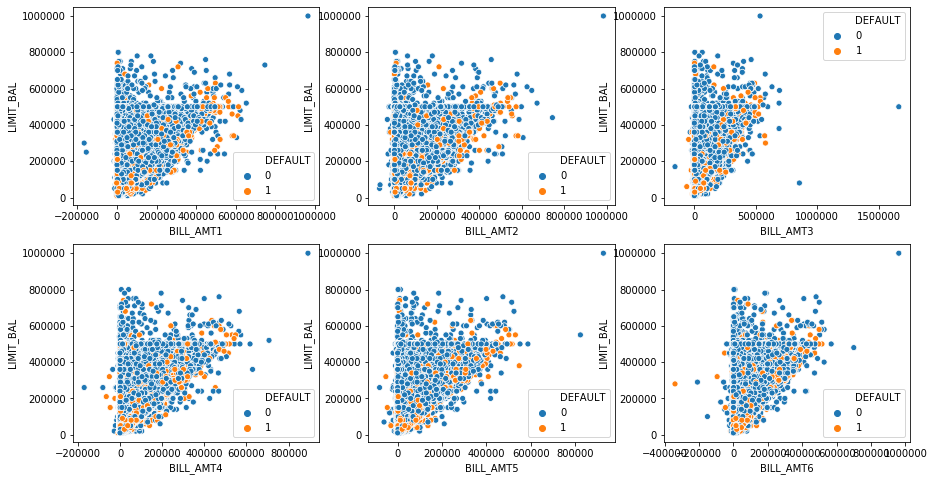

In [180]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.scatterplot(x='BILL_AMT1',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,0])
sns.scatterplot(x='BILL_AMT2',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,1])
sns.scatterplot(x='BILL_AMT3',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,2])
sns.scatterplot(x='BILL_AMT4',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,0])
sns.scatterplot(x='BILL_AMT5',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,1])
sns.scatterplot(x='BILL_AMT6',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,2])
plt.show()

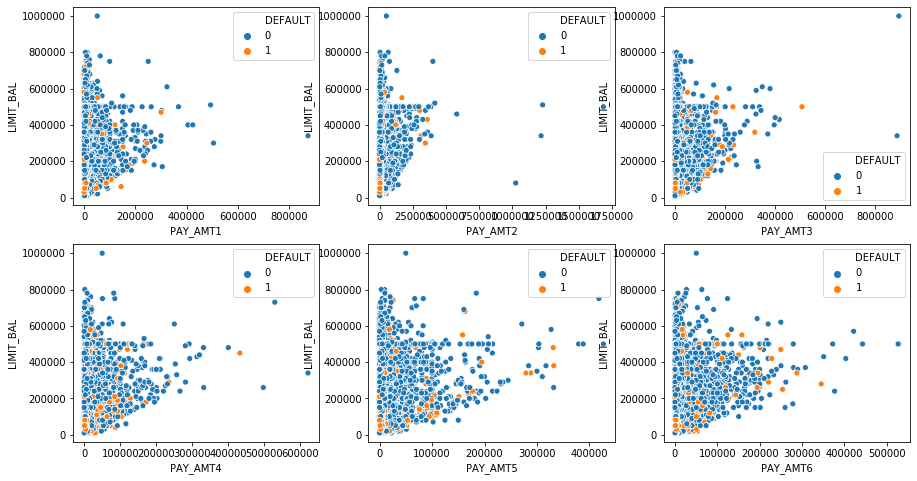

In [181]:
fig,axes = plt.subplots(2,3,figsize=(15,8))
sns.scatterplot(x='PAY_AMT1',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,0])
sns.scatterplot(x='PAY_AMT2',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,1])
sns.scatterplot(x='PAY_AMT3',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[0,2])
sns.scatterplot(x='PAY_AMT4',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,0])
sns.scatterplot(x='PAY_AMT5',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,1])
sns.scatterplot(x='PAY_AMT6',y='LIMIT_BAL',data=df,hue='DEFAULT',ax=axes[1,2])
plt.show()

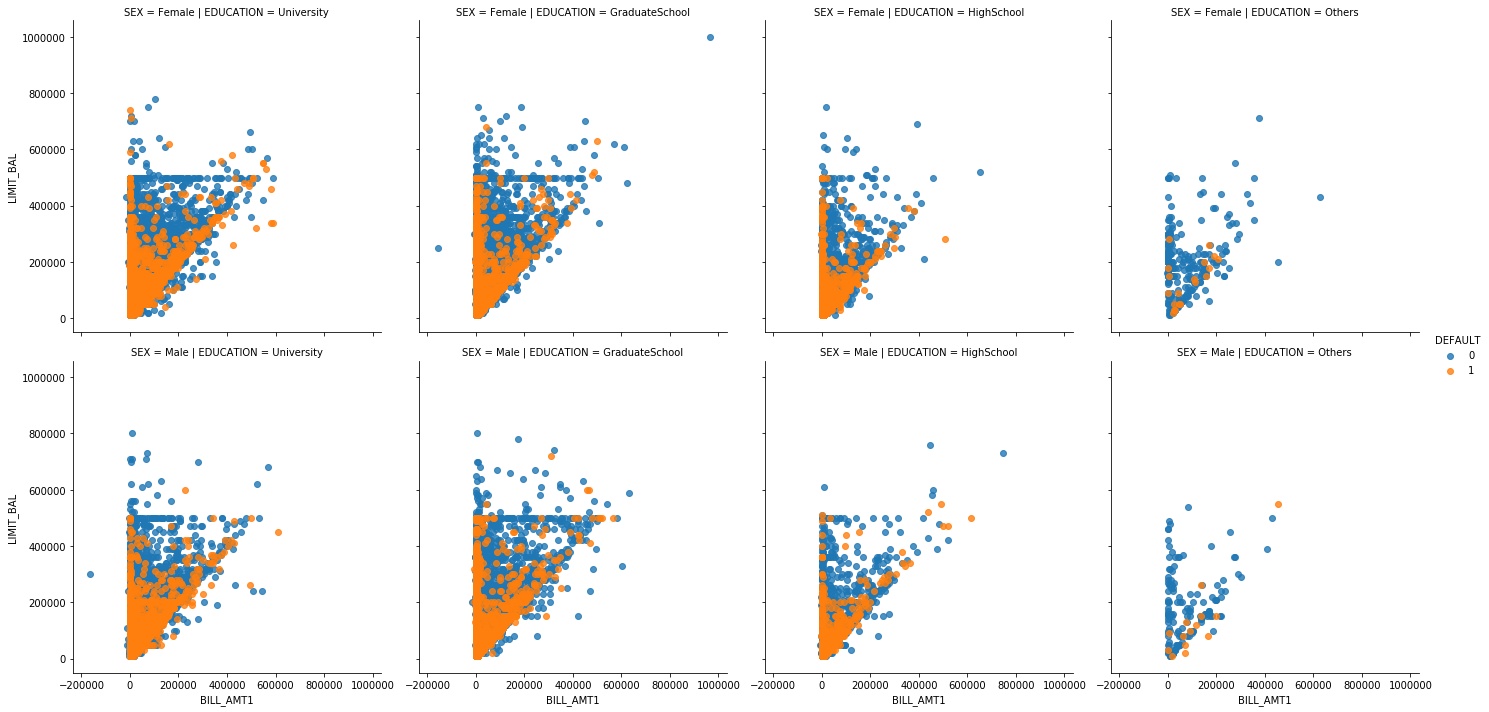

In [195]:
sns.lmplot(x='BILL_AMT1',y='LIMIT_BAL',data=df,fit_reg=False,row='SEX',col='EDUCATION',hue='DEFAULT')
plt.show()

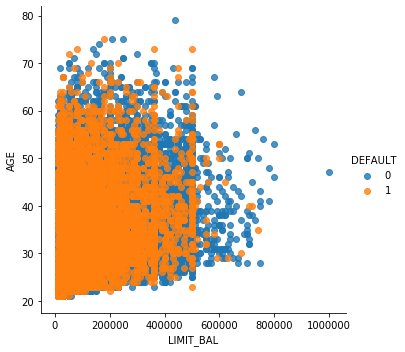

In [196]:
sns.lmplot(x='LIMIT_BAL',y='AGE',data=df,fit_reg=False,hue='DEFAULT')
plt.show()

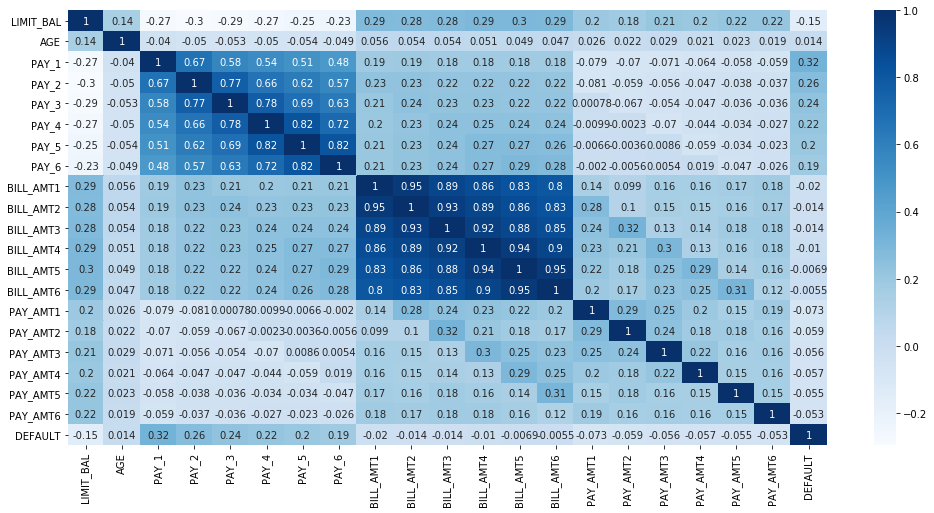

In [201]:
plt.figure(figsize=(17,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

# Feature Engineering

In [243]:
df2=pd.read_csv('credit_card.csv')
df2=df2.drop('ID',axis=1)

In [244]:
df=df2.drop_duplicates(keep='first')
df.shape

(29965, 24)

In [245]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [246]:
df['SEX']=df['SEX'].map({1:'Male',2:'Female'})

In [247]:
df['EDUCATION']=df['EDUCATION'].map({1:'GraduateSchool',2:'University',3:'HighSchool',4:'Others',0:'Others',5:'Others',6:'Others'})

In [248]:
df['MARRIAGE']=df['MARRIAGE'].map({1:'Married',2:'Single',3:'Others',0:'Others'})

### New Feature Creation

In [249]:
df['DEMOGRAPHICS']=df['SEX'].astype('str')+'_'+df['EDUCATION']+'_'+df['MARRIAGE']

In [250]:
def age_cat(y):
    if y>=20 and y<40:
        return "Young"
    elif y>=40 and y<60:
        return "Middle Aged"
    elif y>=60 and y<80:
        return "Senior Citizens"

In [251]:
df['Age_Category']=df['AGE'].apply(age_cat)

In [252]:
def limit_cat(x):
    if x>=10000 and x<208000:
        return "Low Limit Holder"
    elif x>=208000 and x<406000:
        return "Medium Limit Holder"
    elif x>=406000 and x<604000:
        return "High Limit Holder"
    elif x>=604000 and x<802000:
        return "Very High Limit Holder"
    elif x>=802000 and x<1000000:
        return "Ultra High Limit Holder"

In [253]:
df['Credit_Limit_Category']=df['LIMIT_BAL'].apply(limit_cat)

In [254]:
df['TOTAL_RISK_VALUE']=df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6']

In [255]:
df["Avg.Bill"]=(df["BILL_AMT1"]+df["BILL_AMT2"]+df["BILL_AMT3"]+df["BILL_AMT4"]+df["BILL_AMT5"]+df["BILL_AMT6"])/6

In [256]:
df["Avg.Outstanding"]=((df["BILL_AMT6"]-df["PAY_AMT5"])+(df["BILL_AMT5"]-df["PAY_AMT4"])+(df["BILL_AMT4"]-df["PAY_AMT3"])+(df["BILL_AMT3"]-df["PAY_AMT2"])+(df["BILL_AMT2"]-df["PAY_AMT1"]))/5

In [257]:
df["Avg.Pay"]=(df["PAY_AMT1"]+df["PAY_AMT2"]+df["PAY_AMT3"]+df["PAY_AMT4"]+df["PAY_AMT5"]+df["PAY_AMT6"])/6

In [258]:
df.shape

(29965, 31)

In [259]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,DEMOGRAPHICS,Age_Category,Credit_Limit_Category,TOTAL_RISK_VALUE,Avg.Bill,Avg.Outstanding,Avg.Pay
0,20000,Female,University,Married,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1,Female_University_Married,Young,Low Limit Holder,-2,1284.000000,620.4,114.833333
1,120000,Female,University,Single,26,-1,2,0,0,0,2,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,Female_University_Single,Young,Low Limit Holder,3,2846.166667,2279.0,833.333333
2,90000,Female,University,Single,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,Female_University_Single,Young,Low Limit Holder,0,16942.166667,13279.2,1836.333333
3,50000,Female,University,Married,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,Female_University_Married,Young,Low Limit Holder,0,38555.666667,35391.2,1398.000000
4,50000,Male,University,Married,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,Male_University_Married,Middle Aged,Low Limit Holder,-2,18223.166667,8470.4,9841.500000


In [260]:
df.drop(['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE','PAY_1','PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],axis=1,inplace=True)

In [261]:
df.head()

,DEFAULT,DEMOGRAPHICS,Age_Category,Credit_Limit_Category,TOTAL_RISK_VALUE,Avg.Bill,Avg.Outstanding,Avg.Pay
0,1,Female_University_Married,Young,Low Limit Holder,-2,1284.000000,620.4,114.833333
1,1,Female_University_Single,Young,Low Limit Holder,3,2846.166667,2279.0,833.333333
2,0,Female_University_Single,Young,Low Limit Holder,0,16942.166667,13279.2,1836.333333
3,0,Female_University_Married,Young,Low Limit Holder,0,38555.666667,35391.2,1398.000000
4,0,Male_University_Married,Middle Aged,Low Limit Holder,-2,18223.166667,8470.4,9841.500000


In [262]:
df.shape

(29965, 8)

## Univariate Analysis

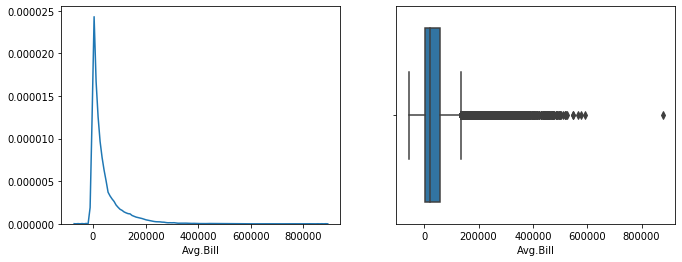

In [263]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['Avg.Bill'],hist=False,ax=axes[0])
sns.boxplot(df['Avg.Bill'],ax=axes[1])
plt.show()

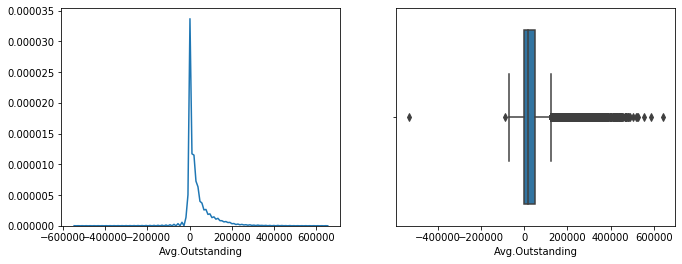

In [264]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['Avg.Outstanding'],hist=False,ax=axes[0])
sns.boxplot(df['Avg.Outstanding'],ax=axes[1])
plt.show()

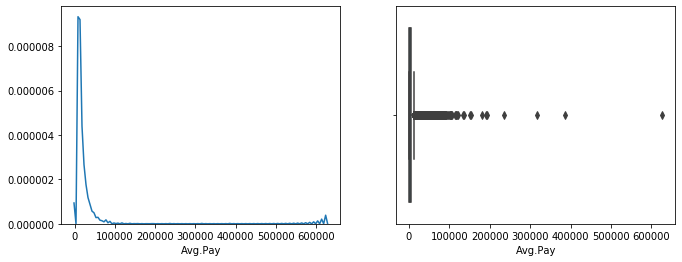

In [265]:
fig,axes=plt.subplots(1,2,figsize=(11,4))
sns.distplot(df['Avg.Pay'],hist=False,ax=axes[0])
sns.boxplot(df['Avg.Pay'],ax=axes[1])
plt.show()

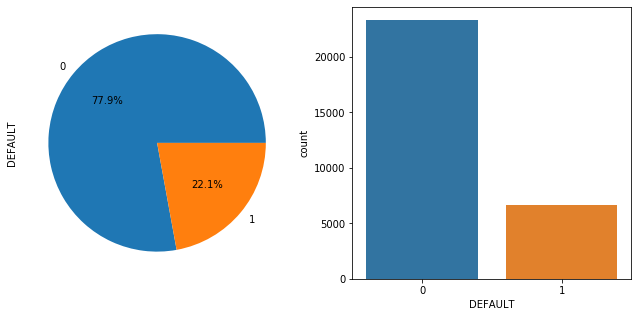

In [266]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['DEFAULT'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['DEFAULT'],ax=axes[1])
plt.show()

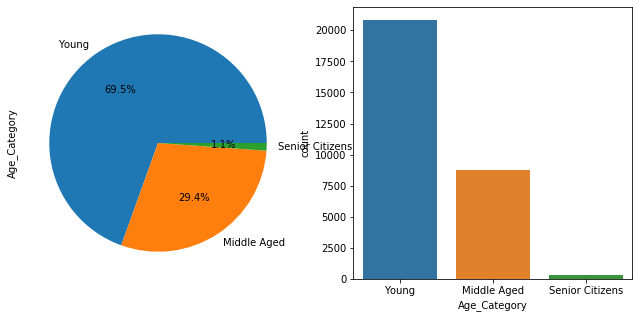

In [267]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['Age_Category'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['Age_Category'],ax=axes[1])
plt.show()

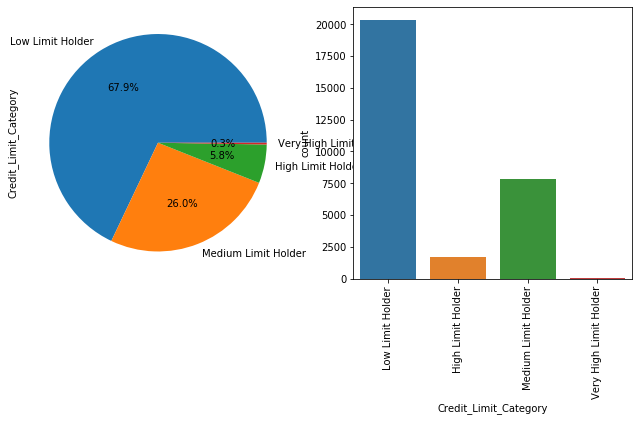

In [269]:
fig,axes = plt.subplots(1,2,figsize=(11,5))
df['Credit_Limit_Category'].value_counts().plot(kind='pie',ax=axes[0],autopct='%1.1f%%')
sns.countplot(df['Credit_Limit_Category'],ax=axes[1])
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

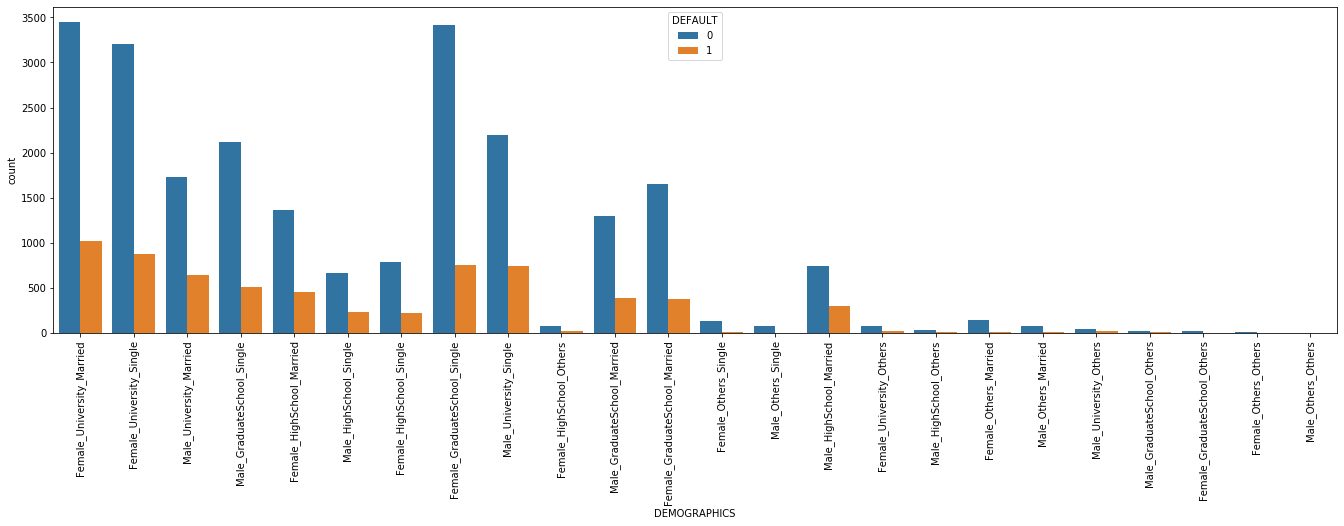

In [237]:
plt.figure(figsize=(23,6))
sns.countplot('DEMOGRAPHICS',data=df,hue='DEFAULT')
plt.xticks(rotation=90)
plt.show()

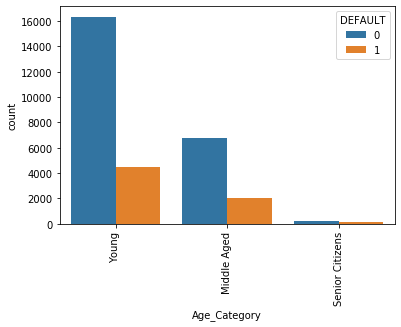

In [229]:
sns.countplot('Age_Category',data=df,hue='DEFAULT')
plt.xticks(rotation=90)
plt.show()

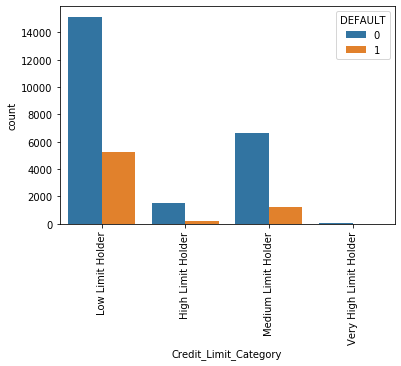

In [232]:
sns.countplot('Credit_Limit_Category',data=df,hue='DEFAULT')
plt.xticks(rotation=90)
plt.show()

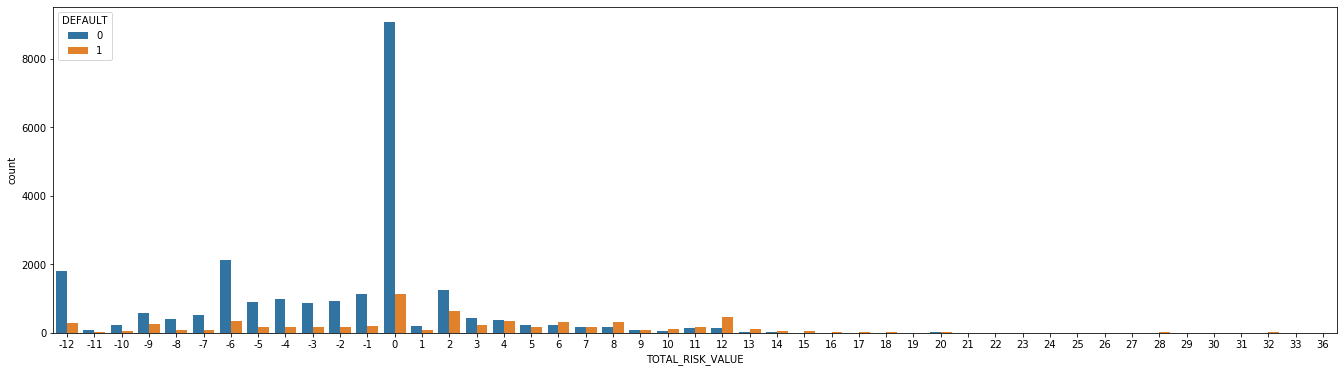

In [235]:
plt.figure(figsize=(23,6))
sns.countplot(x='TOTAL_RISK_VALUE',data=df,hue='DEFAULT')
plt.show()

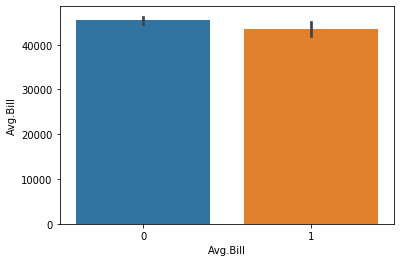

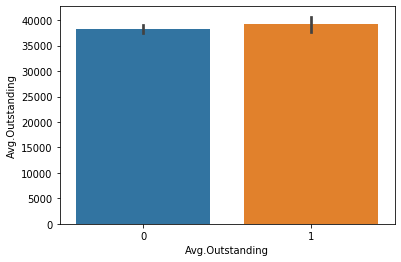

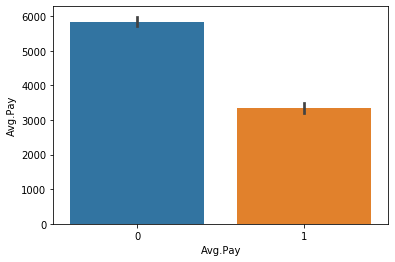

In [236]:
for i in df.columns:
    if df[i].dtype=='float64':
        sns.barplot(df['DEFAULT'],df[i])
        plt.xlabel(i)
    plt.show()

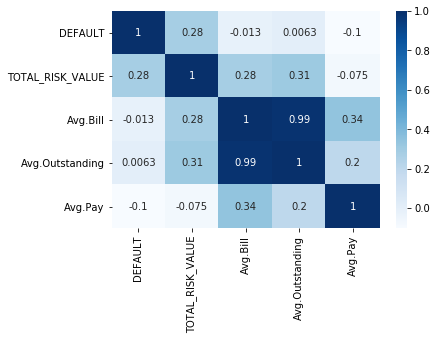

In [270]:
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()